In [10]:
import pandas as pd
import nfl_data_py as nfl
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Load data from the package
chap_0_file = "./data/pbp_py_preface_0.csv"

if os.path.isfile(chap_0_file):
    game_schedule = pd.read_csv(chap_0_file, low_memory=False)
else:
    game_schedule = nfl.import_schedules(range(2016,2022))
    game_schedule.to_csv(chap_0_file)


In [9]:
gb_games = (
  game_schedule
  .query("away_team == 'GB' or home_team == 'GB'")
  .assign(
    gb_score = lambda x: np.where(x['away_team'] == 'GB', x['away_score'], x['home_score']),
    other_score = lambda x: np.where(x['away_team'] != 'GB', x['away_score'], x['home_score']),
    gb_home = lambda x: np.where(x['away_team'] == 'GB', 'Away', 'Home')
  )
  .assign(
    gb_home = lambda x: pd.Categorical(x['gb_home'], categories=['Home', 'Away']),
    score_diff = lambda x: x['gb_score'] - x['other_score'],
    gb_win = lambda x: np.where(x['gb_score'] > x['other_score'], 'Win', 'Lose')
  )
  .assign(
    gb_win = lambda x: pd.Categorical(x['gb_win'], categories=['Win', 'Lose'])
  )
  [['away_team', 'home_team', 'away_score', 'home_score', 'gb_score', 'other_score', 'gb_home', 'game_id', 'score_diff', 'gb_win']]
)

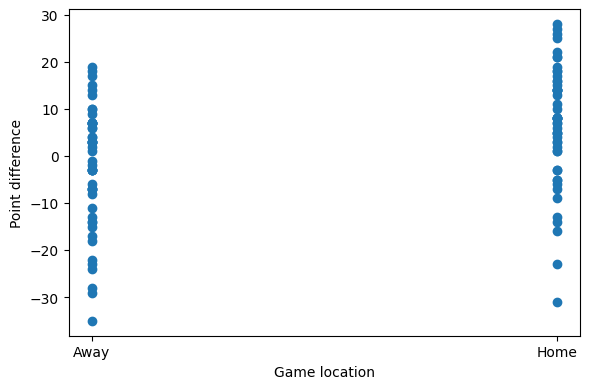

In [13]:
# create and save plot 1
fig, ax = plt.subplots(figsize=(6, 4))
gb_games_filtered = gb_games[gb_games['score_diff'] != 0]
ax.scatter(gb_games_filtered['gb_home'], gb_games_filtered['score_diff'])
ax.set_ylabel('Point difference')
ax.set_xlabel('Game location')
plt.tight_layout()
plot_1 = fig
plot_1.savefig('./figures/gb_games_score_diff.png', dpi=300)